

# Phase 3: Development Part 1 - Loading and Preprocessing the Dataset

PALLI MUHAMMED SUHAIB,  
B.E CSE 3rd yr. 5th SEM,  
311421104060,  
Meenakshi College of Engineering - 3114


Project: Market Basket Insights


 
In this phase of the Market Basket Insights project, we will start building the project by loading and preprocessing 
the transaction dataset. The goal is to prepare the data for association analysis, which will help uncover patterns 
in customer purchasing behavior.

1. Check basic dataset information with data.info().
2. Display the first few rows of the dataset with data.head(10).
3. Check for missing values with data.isnull().sum().
4. Remove rows with missing values in the 'Itemname' column with data.dropna(axis=0, subset=['Itemname'], inplace=True).
5. Remove rows with missing values in the 'CustomerID' column with data.dropna(axis=0, subset=['CustomerID'], inplace=True).
6. Check for and remove duplicate rows with data.drop_duplicates().
7. Group data by "BillNo" and create a list of "Itemname" with data.groupby("BillNo")["Itemname"].apply(list).reset_index().
8. Visualize the number of transactions over time and the top 10 most frequent items.




Here is documentation for the Python code in the file "aiphase3-1":

# Market Basket Analysis - Phase 3

## Loading and Preprocessing Retail Transaction Data

This code loads a retail transaction dataset from an Excel file and performs preprocessing steps like handling missing values, removing duplicates, and transforming the data into basket format for association analysis.

### Imports

The pandas library is imported for data manipulation and matplotlib/seaborn are imported for visualizations.

### Data Loading 

The dataset is loaded into a Pandas DataFrame from 'Assignment-1_Data.xlsx' using pd.read_excel().

### Data Inspection

The DataFrame is inspected using .info(), .head() and .describe() to understand the features, data types, sample values etc.

### Handling Missing Values

Rows with missing values in 'Itemname' and 'CustomerID' columns are dropped using .dropna(). This removes transactions with incomplete information.

### Removing Duplicates

Duplicate rows are dropped from the DataFrame using .drop_duplicates() to ensure each transaction is unique.

### Data Transformation

The data is grouped by 'BillNo' and a list of 'Itemname' is generated using .groupby() and .apply(list). This transforms the data into basket format required for association analysis. 

### Exploratory Analysis

Basic exploratory analysis of top selling items, number of transactions over time, and frequently purchased items is done to understand the data better.

### Visualizations

Matplotlib and seaborn are used to create plots showing transactions time series and a bar chart of top items.

## Summary

The preprocessed transaction data is now ready for association rule mining and market basket analysis to identify patterns, associations, and insights.

In [1]:
import pandas as pd

In [2]:
#importing the data
data = pd.read_excel("Assignment-1_Data.xlsx")

In [3]:
#checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [4]:
#testing whether the data is been imported
data.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
data.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [6]:
#checking for null values in the form of sum
data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [7]:
#removing null values from itemname and the customerID column
data.dropna(axis=0, subset=['Itemname'], inplace = True)
data.dropna(axis=0, subset=['CustomerID'], inplace = True)

In [8]:
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [9]:
# Handling missing values again for recheck
data.dropna()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
# Removing duplicates
data.drop_duplicates()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
#Transforming Data for Association Analysis
transactions = data.groupby("BillNo")["Itemname"].apply(list).reset_index()

In [12]:
transactions

,BillNo,Itemname
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]
...,...,...
18158,581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA..."
18159,581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE..."
18160,581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT..."
18161,581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3..."


In [13]:
data['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Austria                    398
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     17
Saudi Arabia                 9
Name: Country, dtype: int64

In [14]:
data.shape

(388023, 7)

In [15]:
#Testing best selling Items
bst = data.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
bst = bst.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
bst.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
46,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
24,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4000
19,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
41,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
40,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
42,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,636
25,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


In [16]:
#sorting the most popular items in UK by quantity sold.
only_uk = data[data["Country"]=="United Kingdom"]
only_uk.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False)

Itemname
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49182
JUMBO BAG RED RETROSPOT                41981
WHITE HANGING HEART T-LIGHT HOLDER     34648
                                       ...  
WHITE STONE/CRYSTAL EARRINGS               1
CHERRY BLOSSOM PURSE                       1
BLUE/GREEN SHELL NECKLACE W PENDANT        1
BLUE/NAT SHELL NECKLACE W PENDANT          1
CAPIZ CHANDELIER                           1
Name: Quantity, Length: 3833, dtype: int64

In [17]:
data.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [18]:
data['Itemname'] = data['Itemname'].str.strip()

In [19]:
data.dropna(axis=0, subset=['Itemname'], inplace = True)
data = data.drop(columns= ['CustomerID'])
data.isnull().sum()

BillNo      0
Itemname    0
Quantity    0
Date        0
Price       0
Country     0
dtype: int64

In [20]:
data.dtypes

BillNo              object
Itemname            object
Quantity             int64
Date        datetime64[ns]
Price              float64
Country             object
dtype: object

In [21]:
data['BillNo'] =  data['BillNo'].astype('str')
data = data[~data['BillNo'].str.contains('C')]

In [22]:
data['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Austria                    398
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     17
Saudi Arabia                 9
Name: Country, dtype: int64

In [23]:
data.shape

(388023, 6)

In [24]:
import matplotlib.pyplot as plt

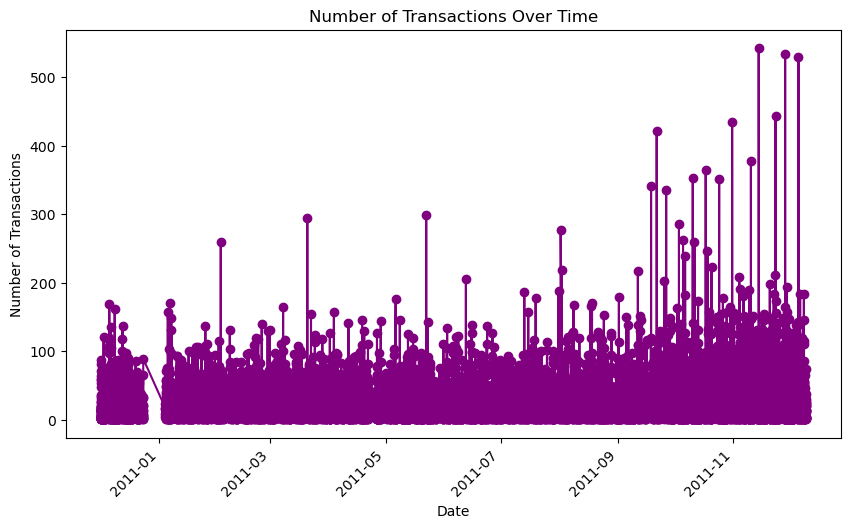

In [25]:
data['Date'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(10, 6), color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.xticks(rotation=45)
plt.show()

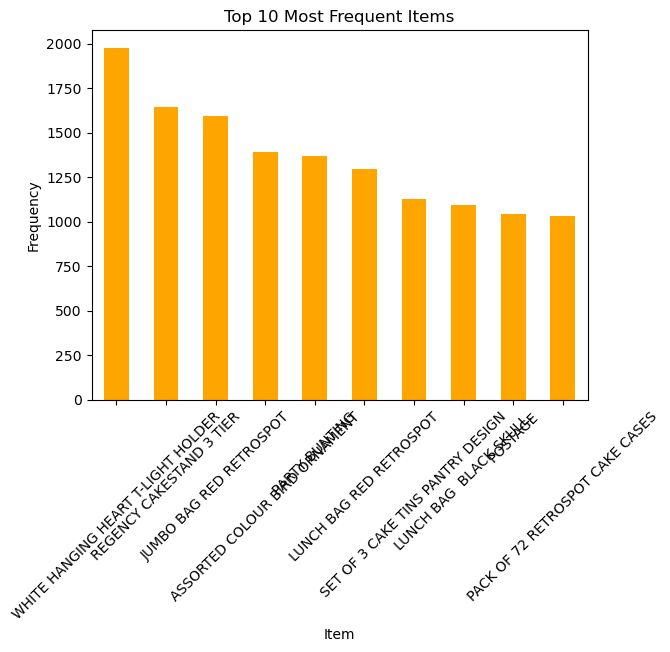

In [26]:
item_counts = pd.Series([item for transaction in transactions['Itemname'] for item in transaction]).value_counts()
item_counts[:10].plot(kind='bar', color='orange')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45)
plt.show()